In [65]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns

## Acquiring Soil Nutrients and Sample Data from the SQL DB

In [66]:
# Connect to the database. If it does not exist, it will be created
conn = sqlite3.connect(r'C:\Users\15404\Documents\GitHub\research_project\sql_db\test3.db')
# Create a cursor object. This is how we interact with the database
curs = conn.cursor()


### IMPORTANT!!! ###
# By default, sqlite does not enforce foreign key constraints. 
# According to the documentation, this is for backwards compatibility. You have to turn them on yourself.
curs.execute('PRAGMA foreign_keys=ON;')

finaldf = pd.read_sql("""SELECT * FROM tSoilNutrients
                      JOIN tSample ON tSoilNutrients.sample_id = tSample.sample_id;""", conn)

conn.close()

In [73]:
x = finaldf[finaldf['site_id'] == 'RRL']['OM']

In [69]:
newdf = pd.read_csv('batch_soil_csv - PCA.csv')

In [74]:
y = newdf[newdf['Site'] == 'RRL']['Organic_Matter']

In [77]:
print(len(x)-len(y))

5


In [81]:
finaldf = finaldf.T.drop_duplicates().T

In [82]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [83]:
## Drop un-used nutrients
finaldf = finaldf.drop(['ENR','CEC','BpH', 'collect_date'], axis = 1)
finaldf.head()

,sample_id,OM,pH,Phosphorus,Potassium,Calcium,Magnesium,Sulfur,Sodium,Zinc,Manganese,Iron,Copper,Boron,site_id
0,BLDTT0,4.3,6.8,18,180,1193,178,3,7,2.3,321,78,1.5,0.5,BLD
1,BLDTT1,4.8,6.8,14,158,1375,226,4,9,2.5,310,89,1.5,0.7,BLD
2,BLDTT2,4.9,6.8,15,177,1335,188,3,7,3,308,68,1.4,0.6,BLD
3,BLDTT3,5.6,7,16,249,1498,247,5,8,3.1,328,70,1.5,0.8,BLD
4,BLDTT4,5.4,6.9,13,143,1284,266,8,9,3,324,84,1.8,0.7,BLD


In [8]:
nutrient_names = finaldf.columns
nutrient_names = nutrient_names.drop(['sample_id','site_id'])

In [9]:
df = finaldf

In [10]:
df[nutrient_names] = df[nutrient_names].astype(float)

       OM   pH  Phosphorus  Potassium  Calcium  Magnesium  Sulfur  Sodium  \
204  31.3  4.4        60.0      129.0    597.0       74.0    29.0    16.0   
205  32.5  4.8        61.0      127.0    693.0       78.0    27.0    17.0   
206  33.7  4.8        60.0      143.0   1023.0      133.0    19.0    15.0   
207  33.4  5.0        81.0      192.0    829.0      118.0    28.0    16.0   
208  25.7  4.9        80.0      171.0    850.0      120.0    26.0    16.0   
209  34.6  5.0        71.0      162.0   1251.0      165.0    21.0    17.0   
210  39.1  5.3        98.0      166.0   1151.0      154.0    19.0    18.0   
211  23.6  5.5       107.0      124.0   1230.0      321.0    17.0    14.0   
212  27.4  5.2        99.0      140.0   1256.0      280.0    16.0    14.0   
213  26.2  4.6        79.0       98.0    620.0      104.0    27.0    15.0   
214  32.7  4.8       105.0       95.0    649.0      115.0    25.0    14.0   
215  32.1  4.7        44.0       97.0    619.0       95.0    24.0    14.0   

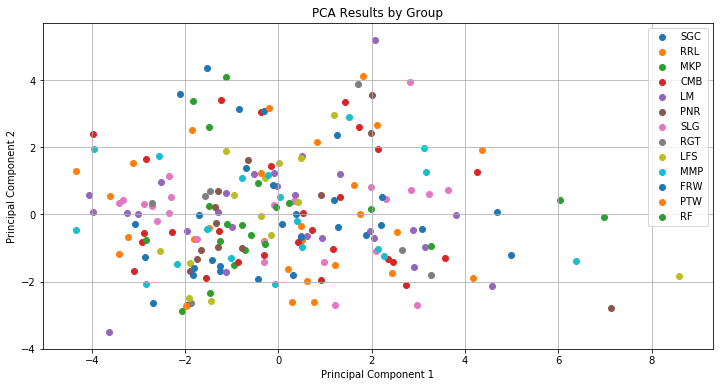

In [35]:
# Step 3: Standardize features separately for each group
grouped = df.groupby('site_id')
pca_results = {}

for group, group_data in grouped:
    print(group_data[nutrient_names])
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(group_data[nutrient_names])

    # Step 4: Create a PCA instance
    pca = PCA(n_components=2)  # You can adjust the number of components as needed

    # Step 5: Fit the PCA model to the standardized data
    pca.fit(scaled_features)

    # Step 6: Transform the standardized data into the principal component space
    pca_data = pca.transform(scaled_features)

    pca_results[group] = pca_data

# Step 7: Visualize the PCA results for each group
plt.figure(figsize=(12, 6))

for group, pca_data in pca_results.items():
    plt.scatter(pca_data[:, 0], pca_data[:, 1], label=group)

plt.title('PCA Results by Group')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
## Using only sites used by Casey/Josh
df = df[df["site_id"].isin(['RRL', 'CMB', 'SLG', 'LFS', 'PTW', 'SGC', 'RF', 'FRW', 'MMP','RGT', 'LM', 'MKP', 'PNR'])]

In [31]:
df.shape

(210, 15)

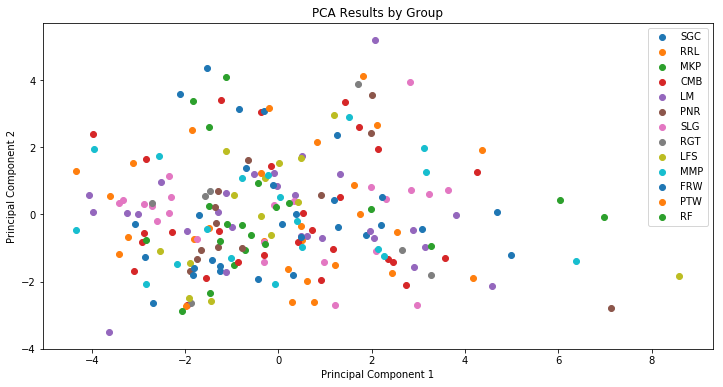

In [32]:
# Step 3: Standardize features separately for each group
grouped = df.groupby('site_id')
pca_results = {}

for group, group_data in grouped:
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(group_data[nutrient_names])

    # Step 4: Create a PCA instance
    pca = PCA(n_components=2)  # You can adjust the number of components as needed

    # Step 5: Fit the PCA model to the standardized data
    pca.fit(scaled_features)

    # Step 6: Transform the standardized data into the principal component space
    pca_data = pca.transform(scaled_features)

    pca_results[group] = pca_data

# Step 7: Visualize the PCA results for each group
plt.figure(figsize=(12, 6))

for group, pca_data in pca_results.items():
    plt.scatter(pca_data[:, 0], pca_data[:, 1], label=group)

plt.title('PCA Results by Group')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

In [33]:
# Using new PCA Code
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(df[nutrient_names])

fig = px.scatter(components, x=0, y=1, color=df['site_id'])
fig.show()

In [16]:
var_values = pca.explained_variance_ratio_
print(var_values)

[0.97748373 0.0127871 ]


In [37]:
df.shape

(210, 15)

In [38]:
df.head()

,sample_id,OM,pH,Phosphorus,Potassium,Calcium,Magnesium,Sulfur,Sodium,Zinc,Manganese,Iron,Copper,Boron,site_id
142,RRL1,19.4,5.9,10.0,180.0,1200.0,153.0,8.0,38.0,2.2,68.0,82.0,4.1,0.3,RRL
143,RRL2,21.3,6.0,9.0,170.0,1069.0,148.0,12.0,19.0,3.0,93.0,75.0,4.5,0.4,RRL
144,RRL3,22.5,5.9,16.0,119.0,853.0,153.0,13.0,18.0,3.8,97.0,100.0,2.9,0.2,RRL
145,RRL4,28.9,5.5,17.0,114.0,878.0,148.0,11.0,17.0,3.1,79.0,131.0,2.6,0.2,RRL
146,RRL5,25.6,6.0,17.0,139.0,1059.0,162.0,11.0,18.0,4.7,130.0,103.0,1.9,0.3,RRL


In [41]:
# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the DataFrame and transform the data
df[nutrient_names] = scaler.fit_transform(df[nutrient_names])

In [42]:
df.head()

,sample_id,OM,pH,Phosphorus,Potassium,Calcium,Magnesium,Sulfur,Sodium,Zinc,Manganese,Iron,Copper,Boron,site_id
142,RRL1,0.223477,-0.091835,-0.943096,0.841108,-0.535109,-0.442921,-0.924541,6.191972,-0.816331,0.123175,-0.548912,2.335138,-0.692419,RRL
143,RRL2,0.406310,0.037597,-0.963274,0.657116,-0.679753,-0.487644,-0.321111,0.802363,-0.709045,0.706286,-0.783272,2.677223,-0.406183,RRL
144,RRL3,0.521784,-0.091835,-0.822026,-0.281246,-0.918249,-0.442921,-0.170253,0.518699,-0.601759,0.799584,0.053727,1.308883,-0.978656,RRL
145,RRL4,1.137641,-0.609564,-0.801847,-0.373242,-0.890646,-0.487644,-0.471969,0.235036,-0.695634,0.379744,1.091606,1.052319,-0.978656,RRL
146,RRL5,0.820090,0.037597,-0.801847,0.086739,-0.690794,-0.362421,-0.471969,0.518699,-0.481062,1.569291,0.154167,0.453670,-0.692419,RRL


In [49]:
df['site_id'].unique()

array(['RRL', 'FRW', 'MMP', 'CMB', 'SLG', 'LFS', 'SGC', 'RGT', 'PTW',
       'LM', 'MKP', 'RF', 'PNR'], dtype=object)

In [53]:
from sklearn.decomposition import PCA

# assuming your dataframe is called 'df'
# and you want to extract 2 principal components
pca = PCA(n_components=4)
pca.fit(df[nutrient_names])

# transform the original data to the new coordinate system
Pt = pca.transform(df[nutrient_names])
Ppca = pd.DataFrame(Pt)

##join df
PC = Ppca.join(df['site_id'], how='right')
PC.head(2)

,0,1,2,3,site_id
142,-0.123247,-1.366375,-0.148227,-0.031034,RRL
143,-0.482291,-1.290344,0.907759,0.256749,RRL


In [54]:
PC['site_id'].unique()

array(['RRL', 'FRW', 'MMP', 'CMB', 'SLG', 'LFS', 'SGC', 'RGT', 'PTW',
       'LM', 'MKP', 'RF', 'PNR'], dtype=object)

In [57]:
PC = PC[PC['site_id'] == 'RRL']
PC.shape

(22, 5)

In [59]:
PC.head()

,0,1,2,3,site_id
142,-0.123247,-1.366375,-0.148227,-0.031034,RRL
143,-0.482291,-1.290344,0.907759,0.256749,RRL
144,-1.343973,-2.041561,-0.169140,0.116448,RRL
145,-0.595809,-2.175906,-0.317516,0.140911,RRL
146,-0.227940,-1.892924,0.028601,0.123628,RRL


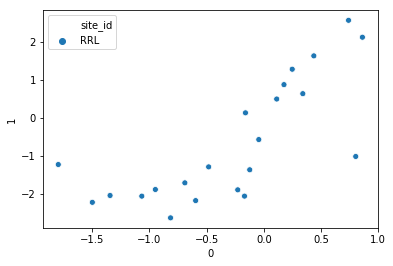

In [58]:
sns.scatterplot(data=PC, x=0, y=1, hue='site_id')